In [1]:
#import relevant packages
import pandas as pd
import numpy as np
import random
import geopandas as gpd

import matplotlib.pyplot as plt
import plotly.express as px
import networkx as nx
import copy

In [2]:
#read OD freight demand data in vehicles in 2030
demand=pd.read_excel('All.xlsx',index_col=0,sheet_name='truckflow')
demand

,Arr. de Bruxelles-Capitale / Arr. van Brussel-Hoofdstad,Arr. Antwerpen,Arr. Hasselt,Arr. Gent,Arr. Leuven,Arr. Brugge,Arr. Nivelles,Arr. Mons,Arr. Liege,Arr. Arlon,...,Noord-Drenthe,Noord-Overijssel,Arnhem/Nijmegen,Flevoland,Utrecht,Groot-Amsterdam,Delft en Westland,Overig Zeeland,Midden-Noord-Brabant,Zuid-Limburg
Arr. de Bruxelles-Capitale / Arr. van Brussel-Hoofdstad,0,14250,6476,20984,99707,25675,80222,21771,8206,5298,...,514,1628,3186,273,995,1630,5019,1696,5157,4002
Arr. Antwerpen,36645,0,229740,397515,196832,271316,26786,123299,88549,44455,...,18497,44468,83224,8570,23357,36120,137523,26599,143021,114708
Arr. Hasselt,14034,270948,0,96607,119730,90466,12168,69573,55599,22349,...,5343,15669,29335,2695,8194,13317,44158,12833,42553,32686
Arr. Gent,16126,402144,75768,0,127553,434309,20117,202072,74057,51080,...,9441,23562,45573,4461,12740,20154,74033,12353,77875,58703
Arr. Leuven,99962,158710,53918,151132,0,84455,63907,110272,62303,22174,...,1744,5806,11209,988,3041,4773,15554,4103,18021,12250
Arr. Brugge,40109,185600,53690,329466,92248,0,25326,235493,87019,47548,...,6941,19403,39208,3753,10274,17415,58617,14247,63850,49353
Arr. Nivelles,30488,19359,13584,43660,65722,46085,0,76632,28851,11743,...,449,1517,2846,240,748,1224,3734,992,4552,3229
Arr. Mons,29842,151341,59975,245856,153073,358082,69745,0,94008,52654,...,6683,18293,34658,3342,10057,17131,55012,19452,56934,46964
Arr. Liege,15360,93743,113526,103070,56501,116353,27015,114395,0,36675,...,4375,12971,24591,2106,7098,11182,34482,10313,39136,30377
Arr. Arlon,6579,27476,13048,40680,21514,48349,8149,43099,24037,0,...,2416,7435,14112,1157,4055,6353,18824,5815,21379,16785


In [3]:
#read OD distance data in km
d=pd.read_excel('All.xlsx',index_col=0,sheet_name='distance')
d

,Arr. de Bruxelles-Capitale / Arr. van Brussel-Hoofdstad,Arr. Antwerpen,Arr. Hasselt,Arr. Gent,Arr. Leuven,Arr. Brugge,Arr. Nivelles,Arr. Mons,Arr. Liege,Arr. Arlon,...,Noord-Drenthe,Noord-Overijssel,Arnhem/Nijmegen,Flevoland,Utrecht,Groot-Amsterdam,Delft en Westland,Overig Zeeland,Midden-Noord-Brabant,Zuid-Limburg
Arr. de Bruxelles-Capitale / Arr. van Brussel-Hoofdstad,0,57,77,69,30,110,25,94,98,186,...,325,275,200,233,170,212,173,112,109,116
Arr. Antwerpen,57,0,82,72,77,113,72,131,138,233,...,268,218,144,176,113,155,116,59,52,121
Arr. Hasselt,77,82,0,136,73,177,92,161,56,187,...,350,300,203,258,196,237,198,137,134,62
Arr. Gent,69,72,136,0,89,41,84,116,157,245,...,340,290,215,248,185,227,188,122,124,175
Arr. Leuven,30,77,73,89,0,130,45,114,68,199,...,345,295,220,253,190,232,193,132,129,111
Arr. Brugge,110,113,177,41,130,0,125,122,198,286,...,381,331,256,289,226,268,229,160,165,216
Arr. Nivelles,25,72,92,84,45,125,0,106,95,161,...,340,290,215,248,185,227,187,127,124,131
Arr. Mons,94,131,161,116,114,122,106,0,137,203,...,400,350,275,308,245,287,247,187,184,180
Arr. Liege,98,138,56,157,68,198,95,137,0,131,...,360,309,212,285,223,265,254,193,176,71
Arr. Arlon,186,233,187,245,199,286,161,203,131,0,...,491,441,343,409,346,388,349,288,285,202


In [20]:
#read aggregated highway network structure in these four countries
highway=pd.read_excel('All.xlsx',index_col=0,sheet_name='highway')
highway

,Arr. de Bruxelles-Capitale / Arr. van Brussel-Hoofdstad,Arr. Antwerpen,Arr. Hasselt,Arr. Gent,Arr. Leuven,Arr. Brugge,Arr. Nivelles,Arr. Mons,Arr. Liege,Arr. Arlon,...,Noord-Drenthe,Noord-Overijssel,Arnhem/Nijmegen,Flevoland,Utrecht,Groot-Amsterdam,Delft en Westland,Overig Zeeland,Midden-Noord-Brabant,Zuid-Limburg
Arr. de Bruxelles-Capitale / Arr. van Brussel-Hoofdstad,0,1,0,1,1,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
Arr. Antwerpen,1,0,1,1,0,1,0,0,0,0,...,0,0,0,0,0,0,1,1,1,0
Arr. Hasselt,0,1,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,1
Arr. Gent,1,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Arr. Leuven,1,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
Arr. Brugge,0,1,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
Arr. Nivelles,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
Arr. Mons,1,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Arr. Liege,0,0,1,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
Arr. Arlon,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
#aggregated demand nodes
nodes=list(highway.index)
nodes

['Arr. de Bruxelles-Capitale / Arr. van Brussel-Hoofdstad',
 'Arr. Antwerpen',
 'Arr. Hasselt',
 'Arr. Gent',
 'Arr. Leuven',
 'Arr. Brugge',
 'Arr. Nivelles',
 'Arr. Mons',
 'Arr. Liege',
 'Arr. Arlon',
 'Arr. Namur',
 'Stuttgart, Stadtkreis',
 'Freiburg im Breisgau, Stadtkreis',
 'Munchen, Kreisfreie Stadt',
 'Nurnberg, Kreisfreie Stadt',
 'Wurzburg, Landkreis',
 'Berlin',
 'Bremen, Kreisfreie Stadt',
 'Hamburg',
 'Frankfurt am Main, Kreisfreie Stadt',
 'Kassel, Kreisfreie Stadt',
 'Rostock, Kreisfreie Stadt',
 'Region Hannover',
 'Dusseldorf, Kreisfreie Stadt',
 'Koln, Kreisfreie Stadt',
 'Munster, Kreisfreie Stadt',
 'Bielefeld, Kreisfreie Stadt',
 'Dortmund, Kreisfreie Stadt',
 'Koblenz, Kreisfreie Stadt',
 'Trier, Kreisfreie Stadt',
 'Stadtverband Saarbrucken',
 'Chemnitzer Land',
 'Dresden, Kreisfreie Stadt',
 'Leipziger Land',
 'Magdeburg, Kreisfreie Stadt',
 'Erfurt, Kreisfreie Stadt',
 'Luxembourg (Grand-Duche)',
 'Overig Groningen',
 'Noord-Friesland',
 'Noord-Drenthe',
 'No

In [21]:
#convert dataframe into array
d=np.array(d)
h=np.array(highway)

(49, 49)

In [7]:
#distance array
f=np.zeros((len(nodes),len(nodes)))
for i in range(len(nodes)):
    for j in range(len(nodes)):
        if h[i,j]==1:
            f[i,j]=d[i,j]
d=f
d #distance matrix

array([[  0.,  57.,   0., ...,   0.,   0.,   0.],
       [ 57.,   0.,  82., ...,  59.,  52.,   0.],
       [  0.,  82.,   0., ...,   0., 134.,  62.],
       ...,
       [  0.,  59.,   0., ...,   0.,  96.,   0.],
       [  0.,  52., 134., ...,  96.,   0., 123.],
       [  0.,   0.,  62., ...,   0., 123.,   0.]])

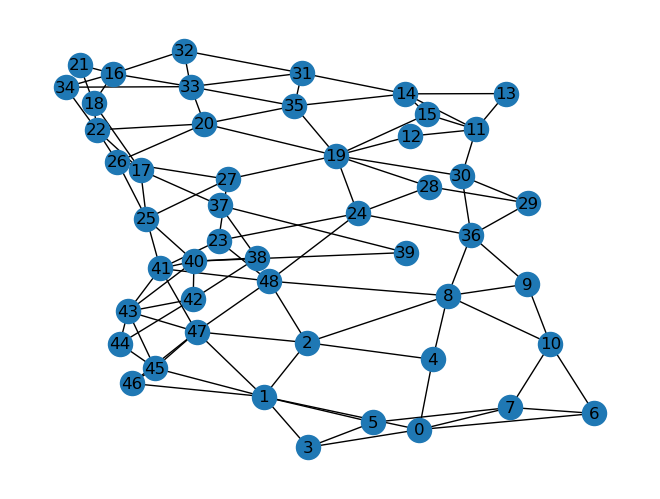

In [9]:
#simply visulize the highway network
dfAdj = pd.DataFrame(f)
G1 = nx.from_pandas_adjacency(dfAdj) 

nx.draw(G1, with_labels=True)
plt.show()

In [10]:
#generate OD index pairs
trip_T=[]
for i in range(len(nodes)):
    for j in range(len(nodes)):
        if i!=j:
            trip_T.append((i,j))
trip_T

[(0, 1),
 (0, 2),
 (0, 3),
 (0, 4),
 (0, 5),
 (0, 6),
 (0, 7),
 (0, 8),
 (0, 9),
 (0, 10),
 (0, 11),
 (0, 12),
 (0, 13),
 (0, 14),
 (0, 15),
 (0, 16),
 (0, 17),
 (0, 18),
 (0, 19),
 (0, 20),
 (0, 21),
 (0, 22),
 (0, 23),
 (0, 24),
 (0, 25),
 (0, 26),
 (0, 27),
 (0, 28),
 (0, 29),
 (0, 30),
 (0, 31),
 (0, 32),
 (0, 33),
 (0, 34),
 (0, 35),
 (0, 36),
 (0, 37),
 (0, 38),
 (0, 39),
 (0, 40),
 (0, 41),
 (0, 42),
 (0, 43),
 (0, 44),
 (0, 45),
 (0, 46),
 (0, 47),
 (0, 48),
 (1, 0),
 (1, 2),
 (1, 3),
 (1, 4),
 (1, 5),
 (1, 6),
 (1, 7),
 (1, 8),
 (1, 9),
 (1, 10),
 (1, 11),
 (1, 12),
 (1, 13),
 (1, 14),
 (1, 15),
 (1, 16),
 (1, 17),
 (1, 18),
 (1, 19),
 (1, 20),
 (1, 21),
 (1, 22),
 (1, 23),
 (1, 24),
 (1, 25),
 (1, 26),
 (1, 27),
 (1, 28),
 (1, 29),
 (1, 30),
 (1, 31),
 (1, 32),
 (1, 33),
 (1, 34),
 (1, 35),
 (1, 36),
 (1, 37),
 (1, 38),
 (1, 39),
 (1, 40),
 (1, 41),
 (1, 42),
 (1, 43),
 (1, 44),
 (1, 45),
 (1, 46),
 (1, 47),
 (1, 48),
 (2, 0),
 (2, 1),
 (2, 3),
 (2, 4),
 (2, 5),
 (2, 6),
 (2,

In [11]:
#Generate path of each OD trip

from itertools import islice
def k_shortest_paths(G, source, target, k, weight=None):
    return list(
        islice(nx.shortest_simple_paths(G, source, target, weight=weight), k)
    )

# trip_T=[(1,0),(0,1),(5,0),(2,5),(3,4)] #Origin and destination of each trip trip(i,j)

K=[0]#the 1 shortest path


t=trip_T

r={}#store each route
for (i,j) in trip_T:
    rs=[]
    for path in k_shortest_paths(G1, i, j, len(K)):
        links=[(path[g],path[g+1]) for g in range(len(path)-1)]
        rs.append(links)
    r[(i,j)]=(rs)


#Generate candidating x_ij based on the potential routes
Candidate_link=[]
for (i,j) in t:
    for fe in K:
        for Link in r[(i,j)][fe]:
            if Link not in Candidate_link:
                Candidate_link.append(Link)

print(r) #path of each OD trip
print(Candidate_link) #all the links in the network

{(0, 1): [[(0, 1)]], (0, 2): [[(0, 1), (1, 2)]], (0, 3): [[(0, 3)]], (0, 4): [[(0, 4)]], (0, 5): [[(0, 1), (1, 5)]], (0, 6): [[(0, 6)]], (0, 7): [[(0, 7)]], (0, 8): [[(0, 4), (4, 8)]], (0, 9): [[(0, 4), (4, 8), (8, 9)]], (0, 10): [[(0, 6), (6, 10)]], (0, 11): [[(0, 4), (4, 8), (8, 36), (36, 30), (30, 11)]], (0, 12): [[(0, 1), (1, 2), (2, 48), (48, 24), (24, 19), (19, 12)]], (0, 13): [[(0, 4), (4, 8), (8, 36), (36, 30), (30, 11), (11, 13)]], (0, 14): [[(0, 4), (4, 8), (8, 36), (36, 30), (30, 11), (11, 14)]], (0, 15): [[(0, 1), (1, 2), (2, 48), (48, 24), (24, 19), (19, 15)]], (0, 16): [[(0, 1), (1, 47), (47, 41), (41, 25), (25, 17), (17, 18), (18, 16)]], (0, 17): [[(0, 1), (1, 47), (47, 41), (41, 25), (25, 17)]], (0, 18): [[(0, 1), (1, 47), (47, 41), (41, 25), (25, 17), (17, 18)]], (0, 19): [[(0, 1), (1, 2), (2, 48), (48, 24), (24, 19)]], (0, 20): [[(0, 1), (1, 2), (2, 48), (48, 24), (24, 19), (19, 20)]], (0, 21): [[(0, 1), (1, 47), (47, 41), (41, 25), (25, 17), (17, 18), (18, 21)]], (0,

In [13]:
#Parameters
# trip_T=[(1,0),(0,1),(5,0),(2,5),(3,4)] #Origin and destination of each trip trip(i,j)


nodes=[i for i in range(len(nodes))]#nodes in the network
# S=[[],[7],[5],[3]]#stop location of each trip at the end of link

marketshare=0.5 #market share of Etruck with pantograph in 2030

options=[90,180,270,360,450,540,630,720,810,900,990,1080,1170,1260,1350,1440,1530,1620,1710,1800,1890,1980] #90kwh/pack

Cd=500000#Catenary cost 500000€/km 
Cb=150#Battery price(€/kwh)
P_ERS=150#ERS charging power(kw)

Ce=0.22#€/kwh electricity cost
vot=38#value of time in €/h
toll_1=0.15#€/km battery only
toll_2=0.1#€/km when using ERS
tao=25 #operational life of infrastructure, years
dr=0.02 #discount rate
mu=0.02#annual maintenaince cost rate
ef=0.9#transfer efficiency
#note excess energy, battery weight
v=80 #speed km/h

#Parameters for truck energy consumption
tho=1.3 #air density kg/m3
Ca=0.6 #aerodynamic drag coefficient
Crr=0.005 #rolling resistence coefficient
Af=10.2 #frontal area of Truck m2
g=9.8 #gravity m/s2
a1=40000 #weight of truck+trailer+full payload excluding battery kg
z=232 #energy density of battery wh/kg

#parameters for battery degradation
SOC_min=0.1 #minimum allowable soc
SOC_max=0.9 #maximum allowable soc
cycf_min=0.01 #minimum cycle fade rate per year
cycf_max=0.034 #maximum cycle fade rate per year
end=0.4 #replacing threshold of battery which is 0.6
calf=0.008 #calendar fade rate per year

eERS=P_ERS*ef*d/v #enery from ERS on each link


ywd=250 #a truck operates 250 times a year
m_t=np.array(demand)*marketshare# OD freight demand matrix in vehicles

TTC_max=8894956343.824724 #€/year, maximum value of TTC
IC_max=965535483.6246197 #€/year, maximum value of IC

#by trying different combinations of weight to find all potential solutions
w1=0.02#weight for IC
w2=0.98#weight for TTC

In [14]:
#function2 value(the most important one)
#function to calculate the combined objective function value(fitness value)

def function2(x,y): #objective function
    t=trip_T
    x=dict(zip(Candidate_link,x)) #x(1,2):1 link1,2 is electrified
    y=dict(zip(t,y))#route selection of each trip
    
    #Investment cost+maintanence cost per year
    IC=0
    Elength=0
    for (i,j) in Candidate_link: 
        Elength = Elength + x[(i,j)]*d[i,j] #ERS length
        IC = IC + Cd*x[(i,j)]*d[i,j]*(dr/(1-pow(1+dr,-tao))+mu) #EAC    
    
    #Smart search method to calculate assigned battery of each OD trip
    BAT={}#store the battery size of each trip
    #based on ERS location and SOC constraints to search for the smallest battery size for each trip(kwh)
    e={} #store the net energy of each trip got from ERS(kwh)
    P_E={}#truck energy consumption rate of each trip kw
    Flow=dict(zip(Candidate_link,[0]*len(Candidate_link)))#energy demand on each link
    
    for (i,j) in t: #loop over every trip t(i,j)
    #loop over each battery option from small to big one, 
    #when the one battery option suffics the SOC constraint under a certain design of ERS, 
    #this battery option is assigned for trip t(i,j)    
        for bat in options:
            route=r[(i,j)][y[(i,j)]] #[[1,2],[2,5],[5,3]] trip(1,3): links on the route of trip t(i,j)
            SOC=[0 for vi in range(len(route))]#store the SOC of each link of each trip t(i,j)
            e_link=[0 for vi in range(len(route))]#store the net energy from ERS on each link of each trip
            a2=bat*1000/z #battery weight calcualtion based on bat(kg)
            P_Etruck=((tho*Ca*Af*pow(v/3.6,3)/2)+(a1+a2)*g*Crr*v/3.6)/1000 #enery consumption rate of truck based on total weight(kw) 
            for k in range(len(route)): #loop over each link of route of trip t(i,j)
                #energy conservation equation
                if route[k][0] ==i: #if starting node of link is the origin of trip t(i,j)
                    SOC[k]=min(SOC_max, SOC_max+(eERS[route[k][0],route[k][1]]*x[(route[k][0],route[k][1])]-
                                                 d[route[k][0],route[k][1]]*P_Etruck/v)/bat)
                    #calculate the energy got from ERS on a link if that link is electrified x_ij=1
                    if SOC[k]-SOC_max==0: #only when P_ERS>P_etruck
                        e_link[k]=x[(route[k][0],route[k][1])]*d[route[k][0],route[k][1]]*P_Etruck/v
                    else:# if SOC after passing through a link, it can decrease, the energy got from ERS is the energy supply from ERS
                        e_link[k]=eERS[route[k][0],route[k][1]]*x[(route[k][0],route[k][1])]
                if route[k][0]!=i: #if starting node of link is not the origin of trip t(i,j)
                    SOC[k]=min(SOC_max, SOC[k-1]+(eERS[route[k][0],route[k][1]]*x[route[k][0],route[k][1]]-
                                                  d[route[k][0],route[k][1]]*P_Etruck/v)/bat)
                    if SOC[k]-SOC[k-1]>=0:
                        e_link[k]=(SOC[k]-SOC[k-1])*bat+x[(route[k][0],route[k][1])]*d[route[k][0],route[k][1]]*P_Etruck/v
                    else:
                        e_link[k]=eERS[route[k][0],route[k][1]]*x[(route[k][0],route[k][1])]
                if SOC[k]<SOC_min:#if the SOC on one of the link is lower than SOC_min, then skip this battery option
                    break
            if SOC[len(route)-1]>=SOC_min: #if the SOC on each meet the constaints, then this battery option will be assigned for trip(i,j)
                BAT[(i,j)]=bat# battery option assigned for trip t(i,j)
                e[(i,j)]=sum(e_link)# trip(ij) 的total energy got from ERS(summation of energy got from ERS on each link) of trip t(i,j)
                P_E[(i,j)]=P_Etruck #Etruck energy consumption rate based on battery option assigned for trip t(i,j)
                for k in range(len(route)):
                    Flow[route[k][0],route[k][1]]=Flow[(route[k][0],route[k][1])]+e_link[k]*m_t[(i,j)]
                break
    
    #battery lifespans and battery costs calculation
    BC={} #store battery costs of each trip
    LS={} #store the battery lifespan of each trip
    ls_av=0
    for (i,j) in t: #loop over each trip
        route=r[(i,j)][y[(i,j)]] #[[1,2],[2,5],[5,3]] trip(1,3) route of each trip
        electrified_distance=0
        distance=0
        for k in range(len(route)):
            electrified_distance+=x[route[k][0],route[k][1]]*d[route[k][0],route[k][1]] #summation of electrifed length
            distance+=d[route[k][0],route[k][1]] #summation of each link length of route of trip t(i,j) 
        nerate=(1-electrified_distance/distance) #non-electrification of route
        cycf=(cycf_max-cycf_min)*nerate+cycf_min #cycle aging rate per year of trip in %
        lifespan=end/(cycf+calf) #lifespan of battery of trip in year
        LS[(i,j)]=lifespan #store the battery lifespan of trip t(i,j)
        ls_av=lifespan*m_t[(i,j)]+ls_av
        annunity=(1-pow(1+dr,-lifespan))/dr #annunity factor of trip t(i,j) for EAC 
        BC[(i,j)]=(m_t[(i,j)]/ywd)*Cb*BAT[(i,j)]/annunity #EAC #amortized battery cost per year of each trip t(i,j) mutiplying truckfleets
    ls_av=ls_av/(m_t.sum())
    
    #toll cost
    TOC={}
    for (i,j) in t:
        route=r[(i,j)][y[(i,j)]] #[[1,2],[2,5],[5,3]] trip(1,3)
        tocers=0
        tocbat=0    
        for k in range(len(route)):
            tocers+=x[route[k][0],route[k][1]]*d[route[k][0],route[k][1]]*toll_2
            tocbat+=(1-x[route[k][0],route[k][1]])*d[route[k][0],route[k][1]]*toll_1
        TOC[(i,j)]=(tocers+tocbat)*m_t[(i,j)]
    
    
    #Time cost
    TC={}
    for (i,j) in t: #every trip t(i,j)
        route=r[(i,j)][y[(i,j)]] #[[1,2],[2,5],[5,3]] trip(1,3)
        tc_link=[0 for vi in range(len(route))]
        for k in range(len(route)):
            tc_link[k]=d[route[k][0],route[k][1]]/v*vot
        TC[(i,j)]=(sum(tc_link))*m_t[(i,j)]
    
    #energy cost
    EC={}#energy cost of each trip
    EP={}#electricity purchased from ERS
    for (i,j) in t: #every trip t(i,j)
        EP[(i,j)]=e[(i,j)]*m_t[(i,j)] #energy gor from ERS of trip t(i,j) times its truck flow
        e_cost=0
        route=r[(i,j)][y[(i,j)]]
        for k in range(len(route)): #loop over every link of route of trip t(i,j)
            e_cost=d[route[k][0],route[k][1]]*P_E[(i,j)]*Ce/v+e_cost #enery cost based on its real energy consumption rate P_E
        EC[(i,j)]=e_cost*m_t[(i,j)] #energy cost of each trip multiplying its truckflow
    
    TTC = sum(BC.values()) + sum(TOC.values())+sum(EC.values())#TTC , total transport cost based on a certain solution
    
    Obj_value=w1*IC/IC_max+w2*TTC/TTC_max #weighted sum function, normalized
#     Obj_value=IC+TTC
    return [TTC, BAT, LS, BC, TOC, TC, EC, IC, EP,Elength, Flow, ls_av, Obj_value] #Return all kinds of variables that are useful for us


In [15]:
#Genetic algorithm parameters
pop_size = 100 #population size
max_gen = 1000 #maximum generation
K=[0]              #K-shortest paths each trip
gen_no=0 #start from generation 0

#perform improved GA

#Initialization
solution_x=[] #store the solution x which is the electrifed links
solution_y=[] #route choice solution y of each trip
while len(solution_x)< pop_size: #while the generated population size does not reach requirement, keep generating.
    sol1=[]
    sol2=[]
    for i in range(len(Candidate_link)): #all the candidate links will be assigned with 0 or 1
        sol1.append(random.randint(0,1))
    for j in range(len(trip_T)): #each trip will be assigned with a route
        sol2.append(random.choice(K))
#     selected_links, electrified_links=constraint(sol1,sol2) #based on the solution x and y to derive the selected links and electrified links
#     if set(electrified_links)<=set(selected_links): #only at least one trip chooses link(i,j), link(i,j) can be electrifed
    solution_x.append(sol1) # meet the constaints, it will be stored in the population
    solution_y.append(sol2)  

Best_values=[] #store the best fitness value of each generation
while gen_no<max_gen:
    function_values=[] #used to store the fitness value of each solution in current generation
    BAT_all=[] #used to store the battery selection of each trip of each solution in current generation
    BC_all=[] 
    LS_all=[] 
    TC_all=[] 
    TOC_all=[] 
    EC_all=[] 
    EP_all=[]
    Flow_all=[]# enery demand on each link of each soution
    Lifespan_all=[]
    
    #IC and TTC
    IC_all=[] #infrastructure cost of each solution in current generation
    TTC_all=[] #total transport cost of each solution in current generation
    Elength_all=[] #ERS length of each solution in current generation
    
    #input the solution into model to calculate the fitness value of each solution
    for i in range(pop_size): #[TTC, BAT, LS, BC, TOC, TC, EC, IC, EP,Elength, Ls_av, Flow, Obj_value]
        val=function2(solution_x[i],solution_y[i])
        function_values.append(val[-1]) #store the fitness value_value of each solution
        #store other variables
        IC_all.append(val[7])
        TTC_all.append(val[0])
        EP_all.append(val[8])
        Elength_all.append(val[9])
        Flow_all.append(val[10])
        Lifespan_all.append(val[11])
        BAT_all.append(val[1])
        BC_all.append(val[3])
        TOC_all.append(val[4])
        LS_all.append(val[2])
        TC_all.append(val[5])
        EC_all.append(val[6])
    print(f'The best fitness value for genertion{gen_no}:',min(function_values)) #track the computation process, output best fitness value of each generation
    Best_values.append(min(function_values)) #store the best fitness value of current generation
    
    #replace the best solution, only the solution that leads to the greatest results will be stored
    if gen_no==0:#store the variables objective values and fitness values of the best solution of the first generation
        best=min(function_values)
#         Best_values.append(min(function_values))
        index=function_values.index(min(function_values))
        BAT11=BAT_all[index]
        Best_BC=BC_all[index]
        Best_EC=EC_all[index]
        Best_EP=EP_all[index]
    #     Best_x.append(solution_x[function_values.index(min(function_values))])
        best_x=dict(zip(Candidate_link,solution_x[index]))
        routes=dict(zip(t,solution_y[index]))
        Best_Flow=Flow_all[index]
        Best_Lifespan=Lifespan_all[index]
        
        ic_=IC_all[index]
        ttc_=TTC_all[index]
        elength_= Elength_all[index]
        bat_total=0 #total battery in kwh
        for (i,j) in t:
            bat_total=bat_total+m_t[(i,j)]*BAT11[(i,j)]
        bat_cost=sum(Best_BC.values())
        
        x_=solution_x[index]
        y_=solution_y[index]
    if gen_no!=0 and min(function_values)<best:#store the variables objective values and fitness values of the solution that 
        #performs better than previous ever found best solution
        best=min(function_values)
#         Best_values.append(min(function_values))
        index=function_values.index(min(function_values))
        BAT11=BAT_all[index]
        Best_BC=BC_all[index]
        Best_EC=EC_all[index]
        Best_EP=EP_all[index]
    #     Best_x.append(solution_x[function_values.index(min(function_values))])
        best_x=dict(zip(Candidate_link,solution_x[index]))
        routes=dict(zip(t,solution_y[index]))
        Best_Flow=Flow_all[index]
        Best_Lifespan=Lifespan_all[index]
        
        ic_=IC_all[index]
        ttc_=TTC_all[index]
        elength_= Elength_all[index]
        bat_total=0 #total battery in kwh
        for (i,j) in t:
            bat_total=bat_total+m_t[(i,j)]*BAT11[(i,j)]
        bat_cost=sum(Best_BC.values())
        
        x_=solution_x[index]
        y_=solution_y[index]

    #Elitism operator
    fitness_values=copy.deepcopy(function_values)
    fitness_values.sort()# sort the current population based on its fitness value
    

    Q_y=[]
    
    Great_x=[function_values.index(i) for i in fitness_values[0:30]]# take out some best populations
    Q_x=[solution_x[i] for i in Great_x]#the best solution of parent popuations will be automatically stored in the next generation without any change
    Q_y=solution_y
    
    #Generating new population
    while len(Q_x)<pop_size:
        #selection--binary tournament: select two parent chromoosomes
        i=random.randint(0,pop_size-1)
        j=random.randint(0,pop_size-1)
        if function_values[i]<function_values[j]: #chromosome i competes with chromosome j
            par1_x=solution_x[i]
            par1_y=solution_y[i]
        else:
            par1_x=solution_x[j]
            par1_y=solution_y[j]

        i=random.randint(0,pop_size-1)
        j=random.randint(0,pop_size-1)
        if function_values[i]<function_values[j]:
            par2_x=solution_x[i]
            par2_y=solution_y[i]
        else:
            par2_x=solution_x[j]
            par2_y=solution_y[j]
        
        #crossover and mutation
        pro_c=random.random()#probability of crossover
        

        replicator1_x=copy.deepcopy(par1_x) #replicators used to store the gene slices
        replicator1_y=copy.deepcopy(par1_y)
        replicator2_x=copy.deepcopy(par2_x)
        replicator2_y=copy.deepcopy(par2_y)

        #crossover and mutation for x
        if pro_c<0.9:#if probability < 0.8, the chromosome will conduct crossover
            c1=random.randint(0,len(par1_x)-1) #starting point of gene slice
            c2=random.randint(c1,len(par1_x)-1)#ending point of gene slice
            Clip1_x=par1_x[c1:c2] #gene slice
            Clip2_x=par2_x[c1:c2]
            replicator1_x[c1:c2]=Clip2_x#gene exchanged on replicators
            replicator2_x[c1:c2]=Clip1_x
        #mutation
        mut=list(np.random.randint(len(par1_x),size=30))#the location of mutation, in this case I choose 5 random points to mutate
        for tt in mut:
            pro_m=random.random()#probability of mutation
            if pro_m<0.6:
                if par1_x[tt]==0:
                    replicator1_x[tt]=1 #1 to 0
                else:
                    replicator1_x[tt]=0 #or 0 to 1


        offspring1_x=replicator1_x
        offspring1_y=replicator1_y

        offspring2_x=replicator2_x
        offspring2_y=replicator2_y

        Q_x.append(offspring1_x)
#       
        Q_x.append(offspring2_x)

    
    #Deliver the new generated population
    solution_x=Q_x
    solution_y=Q_y
    
    gen_no=gen_no+1 #number of generations + 1

print('Best fitness_value:',best)
print(Best_values.index(min(Best_values)))

print('Best_x:',best_x)
# print('battery selection:', BAT11)
# print('route selection:', routes)
print('energy cost:', sum(Best_EC.values()))
print('energy purchased from ERS:', sum(Best_EP.values()))
print('energy demand on each link:',Best_Flow)
print('average battery lifespan:',Best_Lifespan)

print('IC:', ic_)
print('TTC:', ttc_)
print('ERS length:', elength_)

print('average battery size:', bat_total/(m_t.sum()))
print('amortized battery cost per year:', bat_cost)
print('-----------------------------------')


generations = [i   for i in range(gen_no)]
# fitness_average_value = function_values
# print(len(generations), len(fitness_average_value))
plt.xlabel('generations', fontsize=15)
plt.ylabel('Best values', fontsize=15)
plt.plot(generations, Best_values)
plt.show()

The best fitness value for genertion0: 7656174039.640135
The best fitness value for genertion1: 7624144984.442326
The best fitness value for genertion2: 7621574444.423723
The best fitness value for genertion3: 7620481033.625584
The best fitness value for genertion4: 7548279444.697624
The best fitness value for genertion5: 7515283104.336893
The best fitness value for genertion6: 7515283104.336893
The best fitness value for genertion7: 7498942482.017061
The best fitness value for genertion8: 7481675053.823326
The best fitness value for genertion9: 7417487021.440972
The best fitness value for genertion10: 7417487021.440972
The best fitness value for genertion11: 7416418860.123657
The best fitness value for genertion12: 7369826242.213066
The best fitness value for genertion13: 7369826242.213066
The best fitness value for genertion14: 7364336419.8604765
The best fitness value for genertion15: 7348232027.341299
The best fitness value for genertion16: 7342230979.933988
The best fitness value 

The best fitness value for genertion141: 7082360674.779048
The best fitness value for genertion142: 7082360674.779048
The best fitness value for genertion143: 7082264588.818711
The best fitness value for genertion144: 7082264588.818711
The best fitness value for genertion145: 7082264588.818711
The best fitness value for genertion146: 7082264588.818711
The best fitness value for genertion147: 7082264588.818711
The best fitness value for genertion148: 7082264588.818711
The best fitness value for genertion149: 7080139160.554646
The best fitness value for genertion150: 7080139160.554646
The best fitness value for genertion151: 7080139160.554646
The best fitness value for genertion152: 7080139160.554646
The best fitness value for genertion153: 7080139160.554646
The best fitness value for genertion154: 7080139160.554646
The best fitness value for genertion155: 7080094459.317159
The best fitness value for genertion156: 7079562275.614315
The best fitness value for genertion157: 7079562275.6143

The best fitness value for genertion281: 7061305587.921038
The best fitness value for genertion282: 7061305587.921038
The best fitness value for genertion283: 7061305587.921038
The best fitness value for genertion284: 7060388378.684671
The best fitness value for genertion285: 7060388378.684671
The best fitness value for genertion286: 7060388378.684671
The best fitness value for genertion287: 7060139062.803909
The best fitness value for genertion288: 7060139062.803909
The best fitness value for genertion289: 7060139062.803909
The best fitness value for genertion290: 7060139062.803909
The best fitness value for genertion291: 7060139062.803909
The best fitness value for genertion292: 7060139062.803909
The best fitness value for genertion293: 7060139062.803909
The best fitness value for genertion294: 7060139062.803909
The best fitness value for genertion295: 7060139062.803909
The best fitness value for genertion296: 7060139062.803909
The best fitness value for genertion297: 7059918802.3636

The best fitness value for genertion420: 7042466115.842546
The best fitness value for genertion421: 7042466115.842546
The best fitness value for genertion422: 7042466115.842546
The best fitness value for genertion423: 7042466115.842546
The best fitness value for genertion424: 7042466115.842546
The best fitness value for genertion425: 7042466115.842546
The best fitness value for genertion426: 7042466115.842546
The best fitness value for genertion427: 7042466115.842546
The best fitness value for genertion428: 7042466115.842546
The best fitness value for genertion429: 7042466115.842546
The best fitness value for genertion430: 7042466115.842546
The best fitness value for genertion431: 7042466115.842546
The best fitness value for genertion432: 7042466115.842546
The best fitness value for genertion433: 7042466115.842546
The best fitness value for genertion434: 7042466115.842546
The best fitness value for genertion435: 7042466115.842546
The best fitness value for genertion436: 7042466115.8425

The best fitness value for genertion559: 7041498383.206755
The best fitness value for genertion560: 7041498383.206755
The best fitness value for genertion561: 7041498383.206755
The best fitness value for genertion562: 7041498383.206755
The best fitness value for genertion563: 7041498383.206755
The best fitness value for genertion564: 7041498383.206755
The best fitness value for genertion565: 7041498383.206755
The best fitness value for genertion566: 7041498383.206755
The best fitness value for genertion567: 7041498383.206755
The best fitness value for genertion568: 7041498383.206755
The best fitness value for genertion569: 7041498383.206755
The best fitness value for genertion570: 7041498383.206755
The best fitness value for genertion571: 7041498383.206755
The best fitness value for genertion572: 7041498383.206755
The best fitness value for genertion573: 7041498383.206755
The best fitness value for genertion574: 7041498383.206755
The best fitness value for genertion575: 7041498383.2067

The best fitness value for genertion698: 7041498383.206755
The best fitness value for genertion699: 7041498383.206755
The best fitness value for genertion700: 7041498383.206755
The best fitness value for genertion701: 7041498383.206755
The best fitness value for genertion702: 7041498383.206755
The best fitness value for genertion703: 7041498383.206755
The best fitness value for genertion704: 7041498383.206755
The best fitness value for genertion705: 7041498383.206755
The best fitness value for genertion706: 7041498383.206755
The best fitness value for genertion707: 7041498383.206755
The best fitness value for genertion708: 7041498383.206755
The best fitness value for genertion709: 7041498383.206755
The best fitness value for genertion710: 7041498383.206755
The best fitness value for genertion711: 7041498383.206755
The best fitness value for genertion712: 7041498383.206755
The best fitness value for genertion713: 7041498383.206755
The best fitness value for genertion714: 7041498383.2067

The best fitness value for genertion837: 7041323249.309066
The best fitness value for genertion838: 7041323249.309066
The best fitness value for genertion839: 7041323249.309066
The best fitness value for genertion840: 7041323249.309066
The best fitness value for genertion841: 7041323249.309066
The best fitness value for genertion842: 7041323249.309066
The best fitness value for genertion843: 7041323249.309066
The best fitness value for genertion844: 7041323249.309066
The best fitness value for genertion845: 7041323249.309066
The best fitness value for genertion846: 7039823335.454799
The best fitness value for genertion847: 7039823335.454799
The best fitness value for genertion848: 7039823335.454799
The best fitness value for genertion849: 7039823335.454799
The best fitness value for genertion850: 7039823335.454799
The best fitness value for genertion851: 7039823335.454799
The best fitness value for genertion852: 7039594625.047468
The best fitness value for genertion853: 7039594625.0474

KeyboardInterrupt: 